In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\DK\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('Mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# converting from string to numeric
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
df1 = df.iloc[:, 2:5].values

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
X = df.drop(["CustomerID"], axis=1) # independent variables

In [9]:
X_final = X.copy()

In [10]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import dendrogram

     

In [12]:
means = KMeans(n_clusters=3, max_iter=50)
means.fit(X)

KMeans(max_iter=50, n_clusters=3)

In [13]:
X_final['K_cluster'] =  means.labels_

In [14]:
X_final.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),K_cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


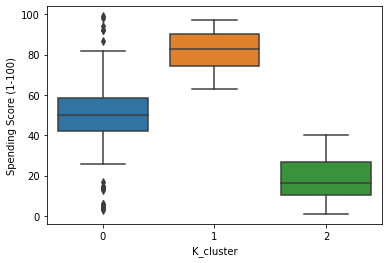

In [15]:
import seaborn as sns
sns.boxplot(x='K_cluster', y='Spending Score (1-100)', data=X_final)

## find optimal cluster

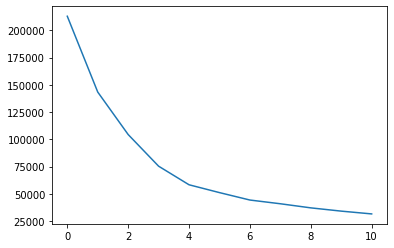

In [26]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [25]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
from sklearn.metrics import silhouette_score
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.29307334005502633
For n_clusters=3, the silhouette score is 0.383798873822341
For n_clusters=4, the silhouette score is 0.4052954330641215
For n_clusters=5, the silhouette score is 0.4402372958247734
For n_clusters=6, the silhouette score is 0.45205475380756527
For n_clusters=7, the silhouette score is 0.4379809530826259
For n_clusters=8, the silhouette score is 0.425945425758392
For n_clusters=9, the silhouette score is 0.41457740954617534
For n_clusters=10, the silhouette score is 0.38558532147466196
For n_clusters=11, the silhouette score is 0.37768511684838385
For n_clusters=12, the silhouette score is 0.3540523169067376


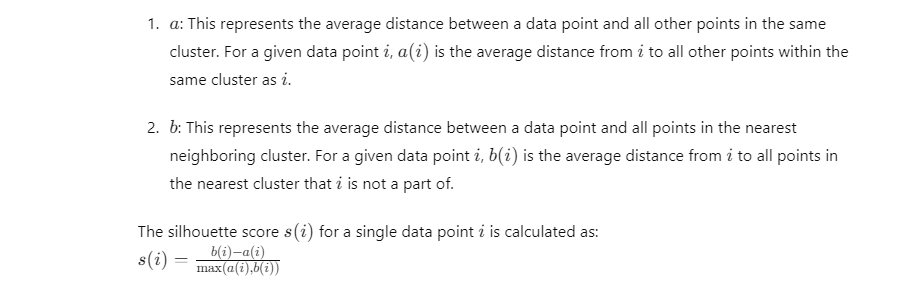

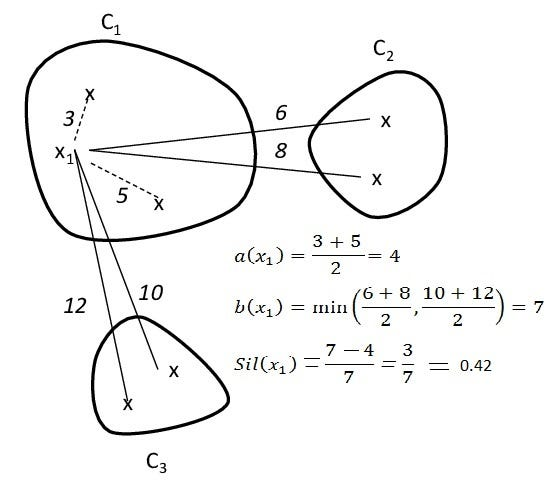

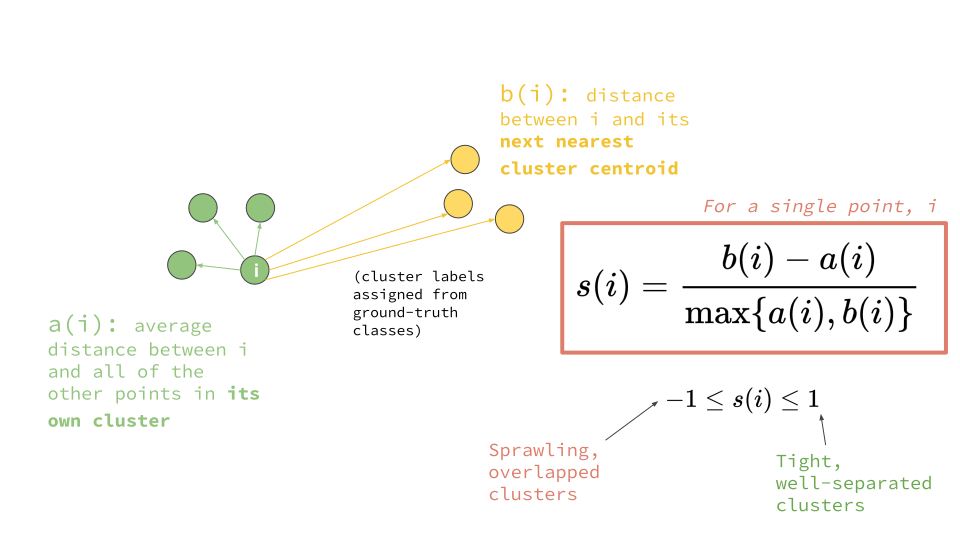

In [27]:
## hierarchial clustering

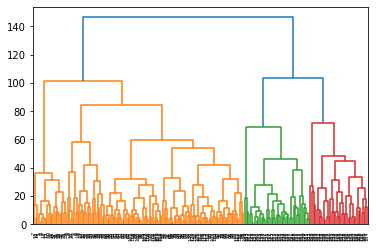

In [28]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
mergings = linkage(X, method = 'complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
labels_=model.fit_predict(X)

In [30]:
X_final['H_cluster'] =  labels_

In [31]:
X_final.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),K_cluster,H_cluster
0,1,19,15,39,0,0
1,1,21,15,81,0,0
2,0,20,16,6,0,0
3,0,23,16,77,0,0
4,0,31,17,40,0,0


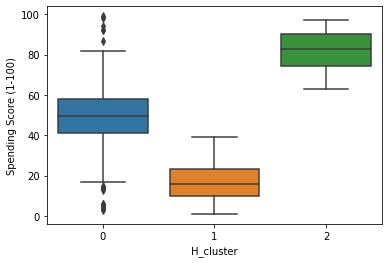

In [32]:
import seaborn as sns
sns.boxplot(x='H_cluster', y='Spending Score (1-100)', data=X_final)

In [33]:
from sklearn_extra.cluster import KMedoids
MedoidS = KMedoids(n_clusters=3)
med = MedoidS.fit(X)

In [34]:
med.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [35]:
X_final['Med_cluster'] =  med.labels_

In [36]:
X_final.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),K_cluster,H_cluster,Med_cluster
0,1,19,15,39,0,0,0
1,1,21,15,81,0,0,0
2,0,20,16,6,0,0,0
3,0,23,16,77,0,0,0
4,0,31,17,40,0,0,0


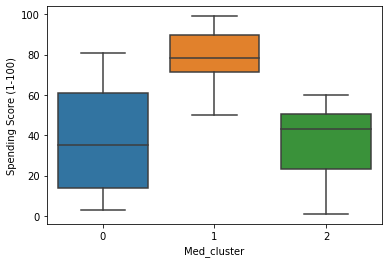

In [37]:
import seaborn as sns
sns.boxplot(x='Med_cluster', y='Spending Score (1-100)', data=X_final)

In [38]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=1 ,min_samples=3,metric='euclidean')

In [39]:
model=db.fit(X[['Spending Score (1-100)']])

In [40]:
X_final['DB_cluster'] =  model.labels_

In [41]:
X_final.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),K_cluster,H_cluster,Med_cluster,DB_cluster
0,1,19,15,39,0,0,0,0
1,1,21,15,81,0,0,0,1
2,0,20,16,6,0,0,0,2
3,0,23,16,77,0,0,0,3
4,0,31,17,40,0,0,0,0


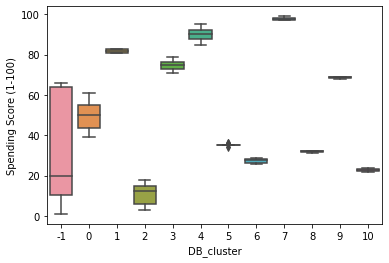

In [42]:
import seaborn as sns
sns.boxplot(x='DB_cluster', y='Spending Score (1-100)', data=X_final)

In [43]:
 model.labels_

array([ 0,  1,  2,  3,  0,  3,  2,  4,  2,  3,  2,  7,  2,  3,  2,  3,  5,
       -1,  6,  7,  5,  3,  2,  3,  2,  1,  8,  0,  8,  4,  2,  3,  2,  4,
        2,  1,  2,  3,  6,  3,  5,  4,  5,  0,  6, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  4,  6,  3,  5,  4,  2,  3,  2,  3,  5,  3,  2,  4,
        2,  3,  2,  3,  2,  4,  0,  4,  2,  7,  5,  3, 10,  4,  2,  4, -1,
        3,  2,  4, -1,  3, -1,  3,  5,  1,  2,  4,  6,  3, -1,  4,  6, -1,
        2,  3,  2,  4,  2,  4,  2,  9,  2,  4,  8,  4,  2,  4,  0,  7, 10,
        9,  2,  4, 10,  9,  2,  4,  2,  3,  6,  3,  2,  1], dtype=int64)